Encoded dataset shape: (999997, 14)

🎯 CREATING BINARY TARGET VARIABLE
PerformanceCategory_Encoded value counts:
PerformanceCategory_Encoded
0    715844
1    141909
2    142244
Name: count, dtype: int64

Binary Target distribution:
Target
0    857753
1    142244
Name: count, dtype: int64
0 = Not At Risk (Average + High Achievers)
1 = At Risk (Struggling Learners)

✅ Final dataset shape: (999997, 14)
✅ Features: 13
✅ Samples: 999997

🤖 XGBOOST MACHINE LEARNING
Features: 13, Samples: 999997
✅ Training set: 799997 samples
✅ Testing set: 200000 samples
✅ Training set target distribution:
Target
0    686202
1    113795
Name: count, dtype: int64

🔧 TRAINING XGBOOST MODEL...
✅ XGBoost model trained successfully!

📊 MODEL PERFORMANCE EVALUATION
🎯 Accuracy: 0.7883

📈 Classification Report:
              precision    recall  f1-score   support

 Not At Risk       0.97      0.78      0.86    171551
     At Risk       0.39      0.84      0.53     28449

    accuracy                           0.79 

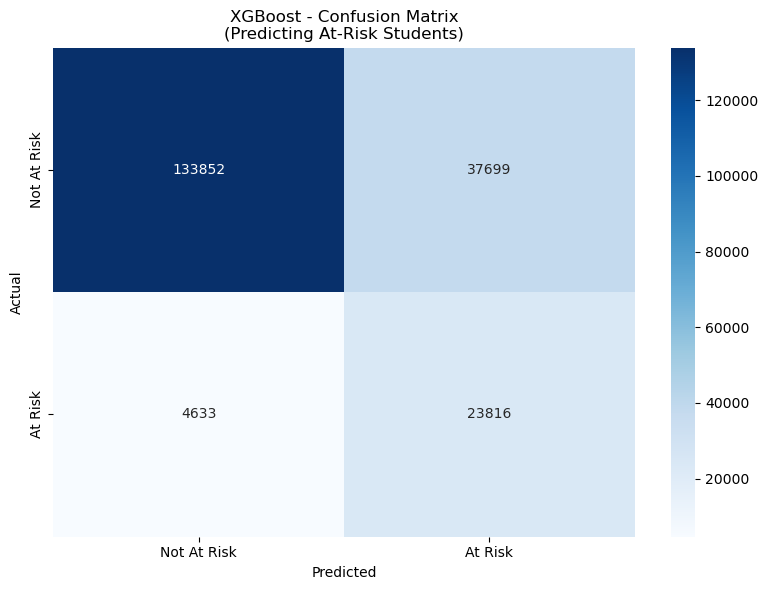


🔍 FEATURE IMPORTANCE ANALYSIS
Top 10 Most Important Features for Predicting At-Risk Students:
                      feature  importance
4              AttendanceRate    0.398661
1              TestScore_Math    0.200687
3           TestScore_Science    0.189696
2           TestScore_Reading    0.165893
10         SchoolType_Encoded    0.005774
9              Gender_Encoded    0.005600
5                  StudyHours    0.005509
8               ParentSupport    0.005438
11  ParentalEducation_Encoded    0.004603
0                         Age    0.004588


C:\Users\user\AppData\Local\Temp\ipykernel_24840\2820895789.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')


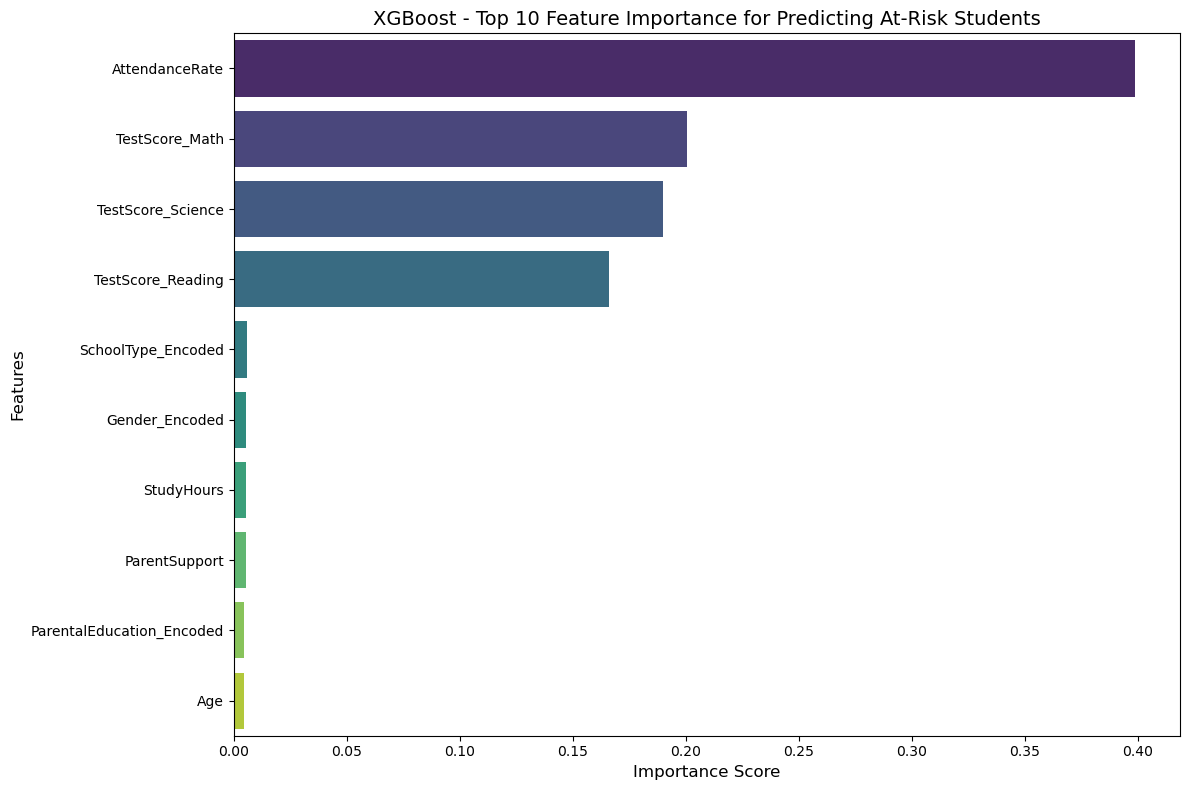


📊 COMPREHENSIVE PERFORMANCE & RISK ANALYSIS


D:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\Anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\user\AppData\Local\Temp\ipykernel_24840\2820895789.py:185: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

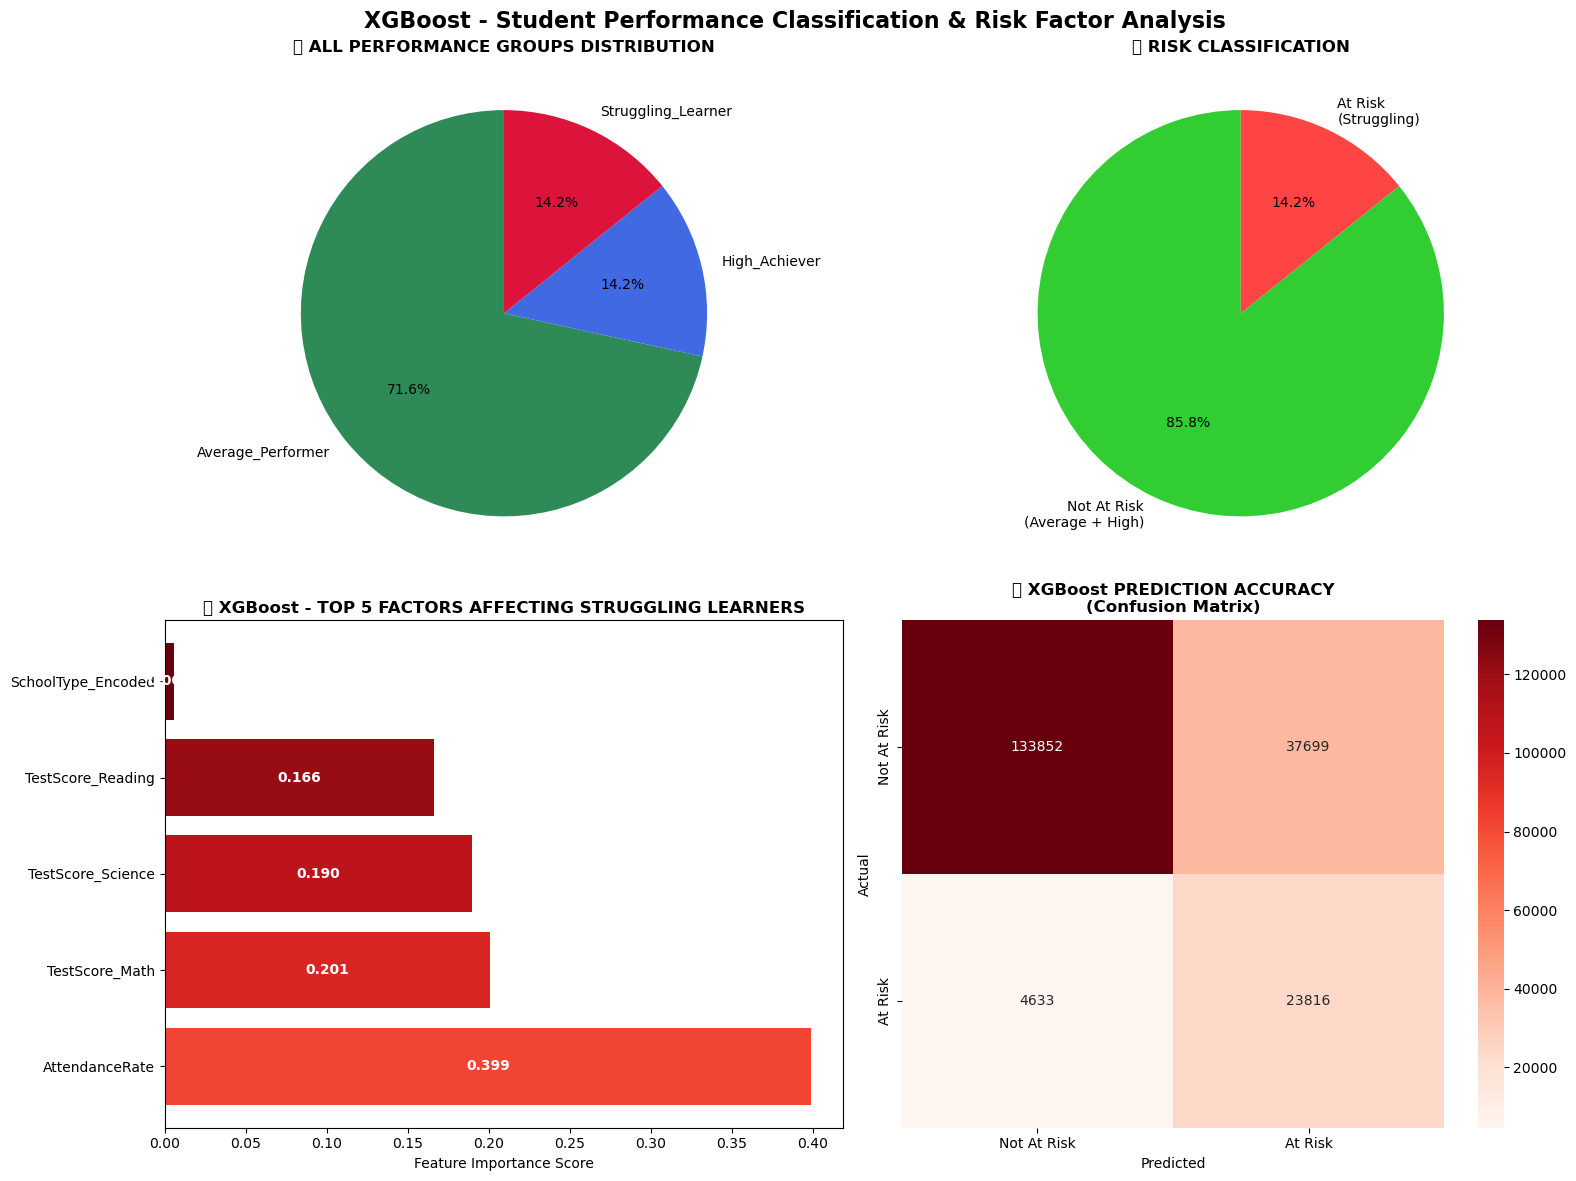


🔍 DETAILED ANALYSIS: STRUGGLING LEARNERS (AT-RISK)
Total Struggling Learners: 142244
Percentage of Total Students: 14.2%

📊 AVERAGE VALUES COMPARISON:
Feature                  Struggling     Others         Difference
----------------------------------------------------------------------
AttendanceRate           0.85           0.91           +0.06
TestScore_Math           64.16          76.77          +12.61
TestScore_Science        64.17          76.78          +12.61
TestScore_Reading        64.18          76.77          +12.59
SchoolType_Encoded       0.15           0.16           +0.00

🚀 XGBOOST - MOST CRITICAL FACTOR FOR STRUGGLING LEARNERS
🎯 MOST IMPORTANT FEATURE: AttendanceRate
📊 Importance Score: 0.3987


C:\Users\user\AppData\Local\Temp\ipykernel_24840\2820895789.py:236: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


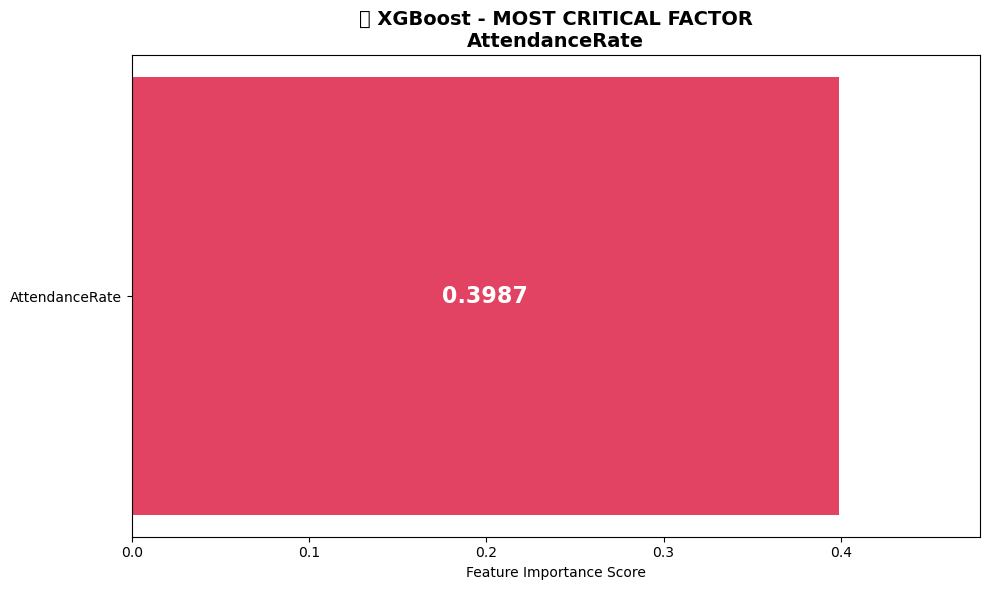


📈 XGBOOST SPECIFIC PERFORMANCE METRICS
Precision: 0.3872 - Ability to correctly identify At-Risk students
Recall:    0.8371 - Ability to find all At-Risk students
F1-Score:  0.5295 - Balance between Precision and Recall
ROC-AUC:   0.8930 - Overall classification performance

🎯 PREDICTION CONFIDENCE ANALYSIS:
High confidence At-Risk predictions (>80%): 23469
High confidence Not-At-Risk predictions (<20%): 94308
Uncertain predictions (20%-80%): 82223

✅ XGBOOST COMPREHENSIVE ANALYSIS COMPLETE!


In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the encoded data
df = pd.read_csv("data/studentdata_encoded.csv")
print(f"Encoded dataset shape: {df.shape}")

# 🎯 CREATE BINARY TARGET - Struggling_Learner as Risk Flag
print("\n🎯 CREATING BINARY TARGET VARIABLE")

print("PerformanceCategory_Encoded value counts:")
performance_counts = df['PerformanceCategory_Encoded'].value_counts().sort_index()
print(performance_counts)

# Map the encoded values to actual category names
performance_mapping = {0: 'Average_Performer', 1: 'High_Achiever', 2: 'Struggling_Learner'}

# Create binary target - Struggling_Learner = At Risk
df['Target'] = (df['PerformanceCategory_Encoded'] == 2).astype(int)

print("\nBinary Target distribution:")
target_counts = df['Target'].value_counts()
print(target_counts)
print("0 = Not At Risk (Average + High Achievers)")
print("1 = At Risk (Struggling Learners)")

# Remove the original multi-class target since we're using binary target
df = df.drop('PerformanceCategory_Encoded', axis=1)

print(f"\n✅ Final dataset shape: {df.shape}")
print(f"✅ Features: {df.shape[1] - 1}")
print(f"✅ Samples: {df.shape[0]}")

# 🎯 XGBOOST MACHINE LEARNING
print("\n" + "="*60)
print("🤖 XGBOOST MACHINE LEARNING")
print("="*60)

# Prepare features (X) and target (y)
X = df.drop('Target', axis=1)  # All columns except target
y = df['Target']  # Binary target: 0=Not At Risk, 1=At Risk

print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain same class distribution in both sets
)

print(f"✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Testing set: {X_test.shape[0]} samples")
print(f"✅ Training set target distribution:")
print(y_train.value_counts())

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,           # Number of trees
    max_depth=6,                # Maximum depth of trees
    learning_rate=0.1,          # Learning rate
    subsample=0.8,              # Subsample ratio of training instances
    colsample_bytree=0.8,       # Subsample ratio of columns
    random_state=42,            # For reproducible results
    eval_metric='logloss',      # Evaluation metric
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # Handle imbalanced data
)

print("\n🔧 TRAINING XGBOOST MODEL...")

# Train the model
xgb_model.fit(X_train, y_train)
print("✅ XGBoost model trained successfully!")

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (At Risk)

# 📊 MODEL EVALUATION
print("\n" + "="*50)
print("📊 MODEL PERFORMANCE EVALUATION")
print("="*50)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy:.4f}")

# Classification Report
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not At Risk', 'At Risk']))

# Confusion Matrix
print("📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not At Risk', 'At Risk'],
            yticklabels=['Not At Risk', 'At Risk'])
plt.title('XGBoost - Confusion Matrix\n(Predicting At-Risk Students)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# 🔍 FEATURE IMPORTANCE ANALYSIS
print("\n" + "="*40)
print("🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*40)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features for Predicting At-Risk Students:")
print(feature_importance.head(10))

# Plot Feature Importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('XGBoost - Top 10 Feature Importance for Predicting At-Risk Students', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# 🎨 COMPREHENSIVE VISUALIZATION - ALL PERFORMANCE GROUPS & RISK FACTORS
print("\n" + "="*60)
print("📊 COMPREHENSIVE PERFORMANCE & RISK ANALYSIS")
print("="*60)

# Create a 2x2 subplot for comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('XGBoost - Student Performance Classification & Risk Factor Analysis', fontsize=16, fontweight='bold')

# 📊 PLOT 1: ALL PERFORMANCE GROUPS DISTRIBUTION
performance_names = [performance_mapping.get(i, f'Category {i}') for i in performance_counts.index]
colors1 = ['#2E8B57', '#4169E1', '#DC143C']  # Green, Blue, Red

axes[0, 0].pie(performance_counts.values, labels=performance_names, autopct='%1.1f%%', 
               colors=colors1, startangle=90)
axes[0, 0].set_title('🎓 ALL PERFORMANCE GROUPS DISTRIBUTION', fontweight='bold')

# 📊 PLOT 2: BINARY RISK CLASSIFICATION
risk_labels = ['Not At Risk\n(Average + High)', 'At Risk\n(Struggling)']
colors2 = ['#32CD32', '#FF4444']  # Green, Red

axes[0, 1].pie(target_counts.values, labels=risk_labels, autopct='%1.1f%%', 
               colors=colors2, startangle=90)
axes[0, 1].set_title('🚨 RISK CLASSIFICATION', fontweight='bold')

# 📊 PLOT 3: TOP 5 FEATURES AFFECTING STRUGGLING LEARNERS (XGBoost)
top_5_features = feature_importance.head(5)
colors3 = plt.cm.Reds(np.linspace(0.6, 1, 5))

bars = axes[1, 0].barh(top_5_features['feature'], top_5_features['importance'], color=colors3)
axes[1, 0].set_title('🔥 XGBoost - TOP 5 FACTORS AFFECTING STRUGGLING LEARNERS', fontweight='bold')
axes[1, 0].set_xlabel('Feature Importance Score')

# Add value labels on bars
for bar, importance in zip(bars, top_5_features['importance']):
    axes[1, 0].text(importance/2, bar.get_y() + bar.get_height()/2, 
                   f'{importance:.3f}', ha='center', va='center', 
                   fontweight='bold', color='white')

# 📊 PLOT 4: CONFUSION MATRIX HEATMAP
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not At Risk', 'At Risk'],
            yticklabels=['Not At Risk', 'At Risk'],
            ax=axes[1, 1])
axes[1, 1].set_title('🎯 XGBoost PREDICTION ACCURACY\n(Confusion Matrix)', fontweight='bold')
axes[1, 1].set_ylabel('Actual')
axes[1, 1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# 🎯 DETAILED ANALYSIS OF STRUGGLING LEARNERS
print("\n" + "="*50)
print("🔍 DETAILED ANALYSIS: STRUGGLING LEARNERS (AT-RISK)")
print("="*50)

# Get the struggling learners data
struggling_data = df[df['Target'] == 1]

print(f"Total Struggling Learners: {len(struggling_data)}")
print(f"Percentage of Total Students: {len(struggling_data)/len(df)*100:.1f}%")

# Show average values for struggling learners vs others
print("\n📊 AVERAGE VALUES COMPARISON:")
print("Feature".ljust(25) + "Struggling".ljust(15) + "Others".ljust(15) + "Difference")
print("-" * 70)

for feature in feature_importance.head(5)['feature']:
    struggling_mean = struggling_data[feature].mean()
    others_mean = df[df['Target'] == 0][feature].mean()
    difference = others_mean - struggling_mean
    
    feature_str = f"{feature.ljust(25)}"
    struggling_str = f"{struggling_mean:.2f}".ljust(15)
    others_str = f"{others_mean:.2f}".ljust(15)
    difference_str = f"{difference:+.2f}"
    
    print(feature_str + struggling_str + others_str + difference_str)

# 🚀 SINGLE MOST IMPORTANT FEATURE ANALYSIS
print("\n" + "="*50)
print("🚀 XGBOOST - MOST CRITICAL FACTOR FOR STRUGGLING LEARNERS")
print("="*50)

top_feature = feature_importance.iloc[0]
print(f"🎯 MOST IMPORTANT FEATURE: {top_feature['feature']}")
print(f"📊 Importance Score: {top_feature['importance']:.4f}")

# Create solo diagram for the most important feature
plt.figure(figsize=(10, 6))
plt.barh([top_feature['feature']], [top_feature['importance']], color='#DC143C', alpha=0.8)
plt.title(f'🚀 XGBoost - MOST CRITICAL FACTOR\n{top_feature["feature"]}', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance Score')
plt.xlim(0, top_feature['importance'] * 1.2)

# Add value annotation
plt.text(top_feature['importance']/2, 0, f'{top_feature["importance"]:.4f}', 
         ha='center', va='center', fontsize=16, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

# 📈 XGBOOST SPECIFIC METRICS
print("\n" + "="*50)
print("📈 XGBOOST SPECIFIC PERFORMANCE METRICS")
print("="*50)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f} - Ability to correctly identify At-Risk students")
print(f"Recall:    {recall:.4f} - Ability to find all At-Risk students")
print(f"F1-Score:  {f1:.4f} - Balance between Precision and Recall")
print(f"ROC-AUC:   {roc_auc:.4f} - Overall classification performance")

# 🎯 PREDICTION CONFIDENCE ANALYSIS
print(f"\n🎯 PREDICTION CONFIDENCE ANALYSIS:")
high_confidence_at_risk = ((y_pred_proba > 0.8) & (y_pred == 1)).sum()
high_confidence_not_risk = ((y_pred_proba < 0.2) & (y_pred == 0)).sum()

print(f"High confidence At-Risk predictions (>80%): {high_confidence_at_risk}")
print(f"High confidence Not-At-Risk predictions (<20%): {high_confidence_not_risk}")
print(f"Uncertain predictions (20%-80%): {len(y_pred_proba) - high_confidence_at_risk - high_confidence_not_risk}")

print("\n" + "="*60)
print("✅ XGBOOST COMPREHENSIVE ANALYSIS COMPLETE!")
print("="*60)

✅ XGBoost model trained successfully!

MODEL PERFORMANCE EVALUATION

📋 Classification Report:
              precision    recall  f1-score   support

 Not At Risk       0.97      0.78      0.86    171551
     At Risk       0.39      0.84      0.53     28449

    accuracy                           0.79    200000
   macro avg       0.68      0.81      0.70    200000
weighted avg       0.88      0.79      0.82    200000


CONFUSION MATRIX ANALYSIS
Confusion Matrix:
[[133852  37699]
 [  4633  23816]]

Confusion Matrix Details:
True Negatives (TN):  133852 - Correctly predicted Not At Risk
False Positives (FP): 37699 - Incorrectly predicted as At Risk
False Negatives (FN): 4633 - Missed At Risk students
True Positives (TP):  23816 - Correctly predicted At Risk
Specificity: 0.7802 - Ability to correctly identify Not At Risk
False Positive Rate: 0.2198


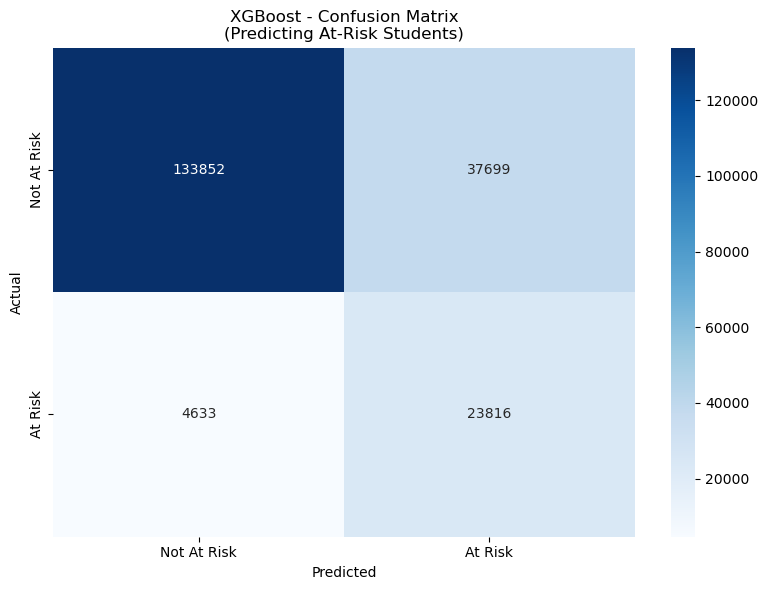


ROC CURVE ANALYSIS


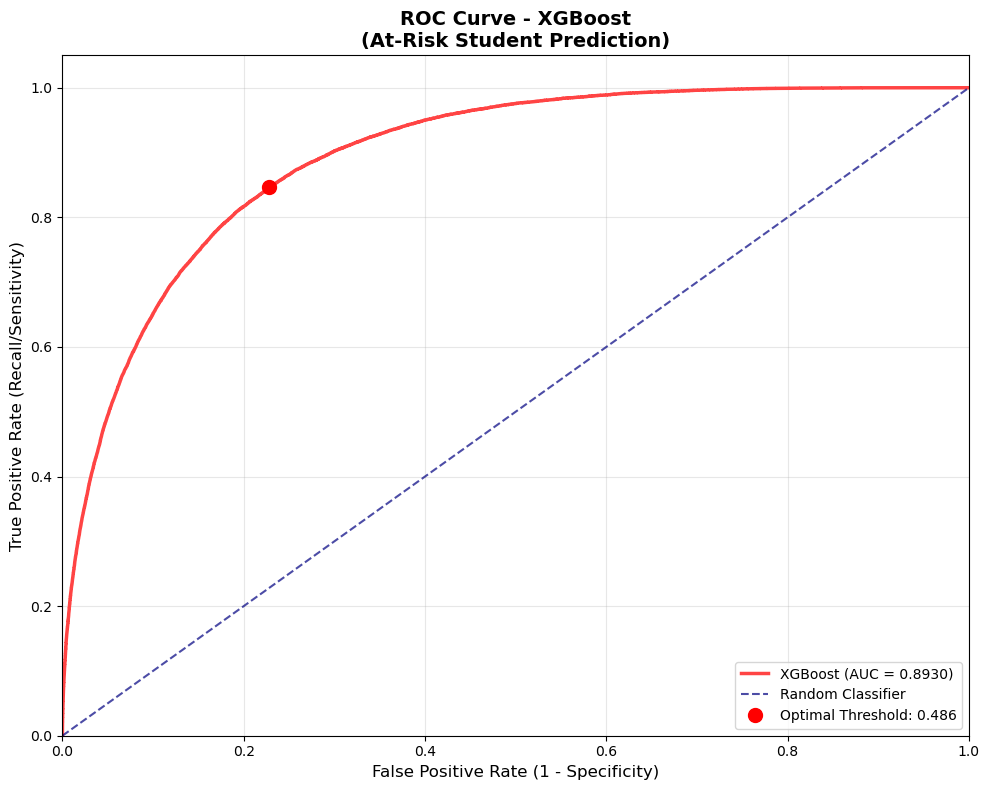

Optimal Threshold: 0.4859
This threshold maximizes the difference between True Positive Rate and False Positive Rate

COMPREHENSIVE PERFORMANCE SUMMARY
              Metric    Value                            Interpretation
            Accuracy 0.788340        Overall correctness of predictions
           Precision 0.387158          Accuracy when predicting At-Risk
Recall (Sensitivity) 0.837147      Ability to find all At-Risk students
         Specificity 0.780246 Ability to correctly identify Not At-Risk
            F1-Score 0.529456      Balance between Precision and Recall
       ROC-AUC Score 0.893033         Overall classification capability
 False Positive Rate 0.219754                      Rate of false alarms

XGBOOST EVALUATION COMPLETE!
EXCELLENT: Model shows strong predictive power!

Key Insights:
• Model can distinguish At-Risk students with 89.3% accuracy
• Correctly identifies 83.7% of actual At-Risk students
• When predicting At-Risk, 38.7% of predictions are correct


In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the encoded data
df = pd.read_csv("data/studentdata_encoded.csv")

# Create binary target - Struggling_Learner = At Risk
df['Target'] = (df['PerformanceCategory_Encoded'] == 2).astype(int)

# Remove the original multi-class target since we're using binary target
df = df.drop('PerformanceCategory_Encoded', axis=1)

# Prepare features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
)

# Train the model
xgb_model.fit(X_train, y_train)
print("✅ XGBoost model trained successfully!")

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# MODEL PERFORMANCE EVALUATION
print("\n" + "="*50)
print("MODEL PERFORMANCE EVALUATION")
print("="*50)

# Calculate all performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not At Risk', 'At Risk']))

# CONFUSION MATRIX ANALYSIS
print("\n" + "="*40)
print("CONFUSION MATRIX ANALYSIS")
print("="*40)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate confusion matrix metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

print(f"\nConfusion Matrix Details:")
print(f"True Negatives (TN):  {tn} - Correctly predicted Not At Risk")
print(f"False Positives (FP): {fp} - Incorrectly predicted as At Risk")
print(f"False Negatives (FN): {fn} - Missed At Risk students")
print(f"True Positives (TP):  {tp} - Correctly predicted At Risk")
print(f"Specificity: {specificity:.4f} - Ability to correctly identify Not At Risk")
print(f"False Positive Rate: {false_positive_rate:.4f}")

# CONFUSION MATRIX DIAGRAM
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not At Risk', 'At Risk'],
            yticklabels=['Not At Risk', 'At Risk'])
plt.title('XGBoost - Confusion Matrix\n(Predicting At-Risk Students)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ROC CURVE ANALYSIS
print("\n" + "="*40)
print("ROC CURVE ANALYSIS")
print("="*40)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#FF4444', linewidth=2.5, label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', alpha=0.7, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall/Sensitivity)', fontsize=12)
plt.title('ROC Curve - XGBoost\n(At-Risk Student Prediction)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, 
         label=f'Optimal Threshold: {optimal_threshold:.3f}')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print("This threshold maximizes the difference between True Positive Rate and False Positive Rate")

# COMPREHENSIVE PERFORMANCE SUMMARY
print("\n" + "="*50)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*50)

# Create a summary dataframe
performance_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity', 
               'F1-Score', 'ROC-AUC Score', 'False Positive Rate'],
    'Value': [accuracy, precision, recall, specificity, f1, roc_auc, false_positive_rate],
    'Interpretation': [
        'Overall correctness of predictions',
        'Accuracy when predicting At-Risk',
        'Ability to find all At-Risk students',
        'Ability to correctly identify Not At-Risk',
        'Balance between Precision and Recall',
        'Overall classification capability',
        'Rate of false alarms'
    ]
})

print(performance_summary.to_string(index=False))

# FINAL ASSESSMENT
print("\n" + "="*60)
print("XGBOOST EVALUATION COMPLETE!")
print("="*60)

if roc_auc > 0.8:
    print("EXCELLENT: Model shows strong predictive power!")
elif roc_auc > 0.7:
    print("GOOD: Model has decent predictive ability")
elif roc_auc > 0.6:
    print("FAIR: Model has some predictive power")
else:
    print("NEEDS IMPROVEMENT: Consider feature engineering or different algorithm")

print(f"\nKey Insights:")
print(f"• Model can distinguish At-Risk students with {roc_auc:.1%} accuracy")
print(f"• Correctly identifies {recall:.1%} of actual At-Risk students")
print(f"• When predicting At-Risk, {precision:.1%} of predictions are correct")